## ML exercise: mushrooms

- train KNN
- train Naive Bayes
- train SVM
- predict outcome comparing 3 models


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, balanced_accuracy_score, roc_curve
import sklearn.model_selection as skms 
import sklearn.preprocessing as skpp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [2]:
raw_data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/agaricus-lepiota.data.csv')
raw_data = pd.DataFrame(raw_data)
raw_data.head(5)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
# check types and whether there are nans
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
p      8123 non-null object
x      8123 non-null object
s      8123 non-null object
n      8123 non-null object
t      8123 non-null object
p.1    8123 non-null object
f      8123 non-null object
c      8123 non-null object
n.1    8123 non-null object
k      8123 non-null object
e      8123 non-null object
e.1    8123 non-null object
s.1    8123 non-null object
s.2    8123 non-null object
w      8123 non-null object
w.1    8123 non-null object
p.2    8123 non-null object
w.2    8123 non-null object
o      8123 non-null object
p.3    8123 non-null object
k.1    8123 non-null object
s.3    8123 non-null object
u      8123 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


#### - check nans, remove or replace

In [ ]:
#raw_data = raw_data.fillna('UNKNOWN')
#raw_data.info()

#### select meaningful features

In [5]:
# check col 
raw_data['e.1'].value_counts()

b    3776
?    2480
e    1119
c     556
r     192
Name: e.1, dtype: int64

In [6]:
# remove weird col and outcome:
data = raw_data.drop(columns = ['p','e.1'])

# get outcome and convert to df
raw_y = raw_data['p']
y = pd.DataFrame({'Edibility':raw_y})


In [8]:
# convert into boolean
y[y=='p'] = 0.0
y[y=='e'] = 1.0
y.head(5)

,Edibility
0,1
1,1
2,0
3,1
4,1


In [9]:
# convert y to integer, is object now!
y = y.astype('int')


#### check if outcome is balanced!

In [10]:
sum(y.Edibility)/len(y.Edibility)

0.5180352086667488

#### - split data into test and train

In [11]:
X_train_raw, X_test_raw, y_train, y_test = skms.train_test_split(data, y, test_size = 0.2)

#### - transform categorical

In [12]:
# import encoder object
one_hot = skpp.OneHotEncoder(handle_unknown = 'ignore') # ! if you encounter a new cat in test set, ignore it

# fit encoder to X train, transform
X_train = one_hot.fit_transform(X_train_raw).toarray() # alt for specific cols: one_hot.fit(data[['col1', 'col2']])

# transform X test (DO NOT FIT!)
X_test = one_hot.transform(X_test_raw).toarray()

# extract new col names:
cat_col_names = one_hot.get_feature_names().tolist()


In [13]:
# convert to data frame
X_train = pd.DataFrame(columns = cat_col_names, data = X_train)

X_test = pd.DataFrame(columns = cat_col_names, data = X_test)


In [14]:
X_train.head(5)

,x0_b,x0_c,x0_f,x0_k,x0_s,x0_x,x1_f,x1_g,x1_s,x1_y,...,x19_s,x19_v,x19_y,x20_d,x20_g,x20_l,x20_m,x20_p,x20_u,x20_w
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### - train KNN

In [ ]:
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, 
#                      leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)

# low number of n_neighbors => overfitting!, too high number => 

In [17]:
mean_roc_auc_knn = []

range_nb = list(range(2,12))

for i in range_nb:
    curr_model = KNeighborsClassifier(n_neighbors = i,
                     weights = 'distance',
                     algorithm = 'auto' 
                    )
     
    mean_roc_auc_knn.append(np.mean(skms.cross_val_score(curr_model, 
                                                         X_train, y_train.Edibility, cv = 6, scoring = 'roc_auc')))
        

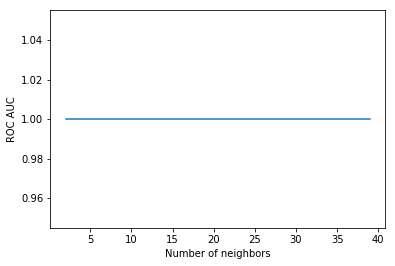

In [18]:
plt.plot(range_nb, mean_roc_auc_knn)
plt.xlabel('Number of neighbors')
plt.ylabel('ROC AUC')
None

#### - train Bernoulli Bayes

In [25]:
# BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
mean_roc_auc_bayes = []

BB_alphas = [0.00001, 0.0001,0.001,0.01, 0.1, 1, 10, 100]

for i in BB_alphas:
    curr_BB = BernoulliNB(alpha = i) 
    mean_roc_auc_bayes.append(np.mean(skms.cross_val_score(curr_BB, X_train, y_train.Edibility, cv = 6, scoring = 'roc_auc')))
        

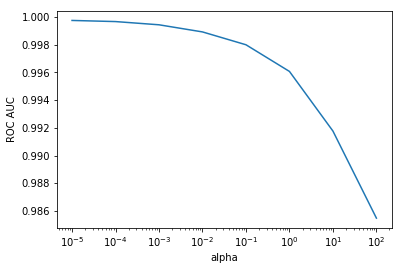

In [26]:
plt.semilogx(BB_alphas, mean_roc_auc_bayes)
plt.xlabel('alpha')
plt.ylabel('ROC AUC')
None

#### - train SVM

In [ ]:
# SVC(C=1.0, kernel=’rbf’, degree=3, 
#    gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, 
#    tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
#    decision_function_shape=’ovr’, random_state=None

In [27]:
C_range = np.linspace(0.001, 1, 10)

mean_roc_auc_SVM = []

for i in C_range:
    curr_SVM = SVC(C = i, gamma='scale',probability=True) 
    mean_roc_auc_SVM.append(np.mean(skms.cross_val_score(curr_SVM, X_train, y_train.Edibility, cv = 6, scoring = 'roc_auc')))
        

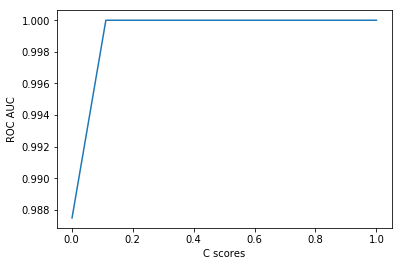

In [29]:
plt.plot(C_range, mean_roc_auc_SVM)
plt.xlabel('C scores')
plt.ylabel('ROC AUC')
None

## And the winner is.....

### all of the above...

Let's finally predict with the Bayes, its fastest

In [30]:
final_BB = BernoulliNB(alpha = 0.000001)  

final_BB.fit(X_train,y_train.Edibility)

predicted_prob_y = final_BB.predict_proba(X_test)
predicted_y = final_BB.predict(X_test)

In [31]:
# calculate true pos and false pos rate
fpr_test, tpr_test, _ = roc_curve(y_test.Edibility, predicted_prob_y[:,1])

roc_df_test = pd.DataFrame({'fpr':fpr_test, 'tpr':tpr_test})


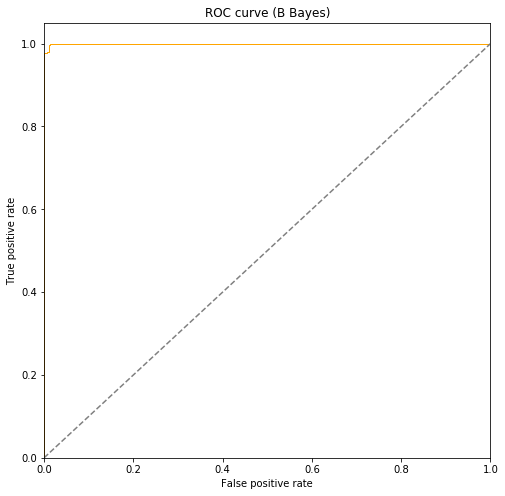

In [32]:
plt.rcParams['figure.figsize'] = (8, 8)

plt.plot(fpr_test, tpr_test, 'orange', linewidth=1)
plt.plot([0, 1], [0, 1],'grey', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC curve (B Bayes)')
None

In [33]:
roc_auc_score(y_test, predicted_prob_y[:,1])

0.999749729252555